# Relación entre sitios de unión a CTCF y protein-coding genes

La primera parte de este Script muestra la correlación existente entre el número de segmentos con estado E9 y el número de genes presentes en cada cromosoma

In [1]:
# Importe de los módulos necesarios
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

dic_E9 = {}
with open('./Interseccion_TODOS_CROMOSOMAS.bed', mode='r') as f:
    reader = csv.reader(f, delimiter='\t')
    for i in reader:
        if i[0] not in dic_E9:
            dic_E9[i[0]] = 0
        else:
            dic_E9[i[0]] += 1

In [2]:
# Creación del diccionario que contiene la cantidad de protein-coding genes por cromosoma

# Comando se búsqueda de protein-coding genes en NCBI (Gene Database):
# ((Homo sapiens[Organism]) AND 1[Chromosome]) AND ("genetype protein coding"[Properties] 
# AND "srcdb refseq"[Properties] AND alive[prop]) 

pc_genes = {}
pc_genes['chr1'] = 2045
pc_genes['chr2'] = 1245
pc_genes['chr3'] = 1064
pc_genes['chr4'] = 751
pc_genes['chr5'] = 872
pc_genes['chr6'] = 1039
pc_genes['chr7'] = 910
pc_genes['chr8'] = 682
pc_genes['chr9'] = 780
pc_genes['chr10'] = 722
pc_genes['chr11'] = 1299
pc_genes['chr12'] = 1018
pc_genes['chr13'] = 330
pc_genes['chr14'] = 609
pc_genes['chr15'] = 603
pc_genes['chr16'] = 868
pc_genes['chr17'] = 1165
pc_genes['chr18'] = 272
pc_genes['chr19'] = 1421
pc_genes['chr20'] = 543
pc_genes['chr21'] = 248
pc_genes['chr22'] = 457
pc_genes['chrX'] = 866

In [3]:
# Asignación de los valores a las variables 'x' e 'y'
x = list(pc_genes.values()) # Lista que cotiene la frecuencia de protein-coding genes por gen
y = list(dic_E9.values()) # Lista que contiene al frecuencia de segmentos E9

# Cálculo del ajuste polinómico para la visualización de la recta
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)

new_x = np.linspace(min(x), max(x)) # Valores que toma la recta en el eje x
new_y = poly(new_x) # Valores que toma la recta en el eje y


In [4]:
# Cálculo del error standard
Resultado_linear_regression_1 = linregress(x, y)

stderr_1 = round(Resultado_linear_regression_1.stderr, 3)

print("Standard deviation:", stderr_1)

Standard deviation: 0.179


In [7]:
# Cálculo del coeficiente de determinación R^2

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = round(correlation_xy**2, 3)

print("R squared:", r_squared)

R squared: 0.763


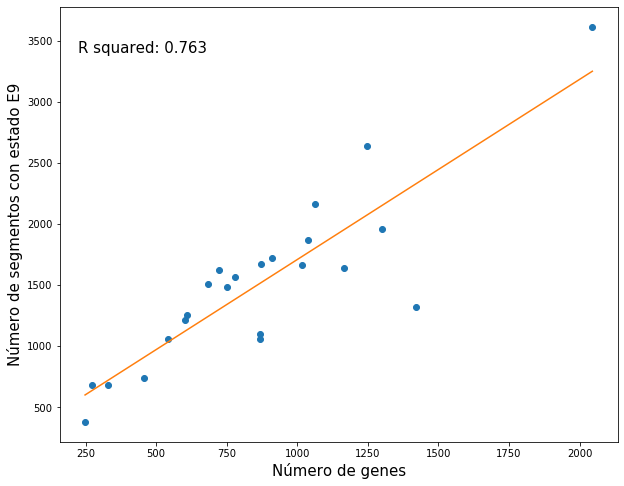

In [8]:
# Creación de gráfica de visualización de la relación entre tamaño de los cromosomas 
# y cantidad de segmentos con estado E9 (contienen sitios de unión a CTCF)

plt.figure(figsize=(10,8))

# Adición de títulos y etiquetas a los ejes
plt.ylabel('Número de segmentos con estado E9', fontsize = 15)
plt.xlabel('Número de genes', fontsize = 15)

# Visualización de los resultados
plt.plot(x, y, "o", new_x, new_y)

# Visualización del error standard
plt.figtext('.15', .8, 'R squared: {}'.format(r_squared), fontsize = 15)

plt.show()

# Relación entre sitios de unión a CTCF y longitud de cromosoma

Esta segunda parte analiza la correlación existente entre el número de segmentos con estado E9 y la longitud de los cromosomas

In [9]:
# Creación del diccionario que contiene pb por cromosoma

pb_chr = {}
pb_chr['chr1'] = 246
pb_chr['chr2'] = 237
pb_chr['chr3'] = 200
pb_chr['chr4'] = 186
pb_chr['chr5'] = 181
pb_chr['chr6'] = 170
pb_chr['chr7'] = 158
pb_chr['chr8'] = 155
pb_chr['chr9'] = 145
pb_chr['chr10'] = 135
pb_chr['chr11'] = 144
pb_chr['chr12'] = 133
pb_chr['chr13'] = 113
pb_chr['chr14'] = 87
pb_chr['chr15'] = 106
pb_chr['chr16'] = 90
pb_chr['chr17'] = 81
pb_chr['chr18'] = 76
pb_chr['chr19'] = 59
pb_chr['chr20'] = 63
pb_chr['chr21'] = 48
pb_chr['chr22'] = 49
pb_chr['chr1X'] = 153


In [10]:
# Asignación de los valores a las variables 'x' e 'y'
x = list(pb_chr.values()) # Lista que cotiene la frecuencia de tamaño de cromosomas
y = list(dic_E9.values()) # Lista que contiene al frecuencia de segmentos E9

# Cálculo del ajuste polinómico para la visualización de la recta
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
new_x = np.linspace(min(x), max(x)) # Valores que toma la recta en el eje x
new_y = poly(new_x) # Valores que toma la recta en el eje y


In [11]:
# Cálculo del error standard

Resultado_linear_regression_2 = linregress(x, y)

stderr_2 = round(Resultado_linear_regression_2.stderr, 3)


print("Standard deviation:", stderr_2)

Standard deviation: 1.488


In [12]:
# Cálculo del coeficiente de determinación R^2

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]

r_squared = round(correlation_xy**2, 3)

print("R squared:", r_squared)

R squared: 0.684


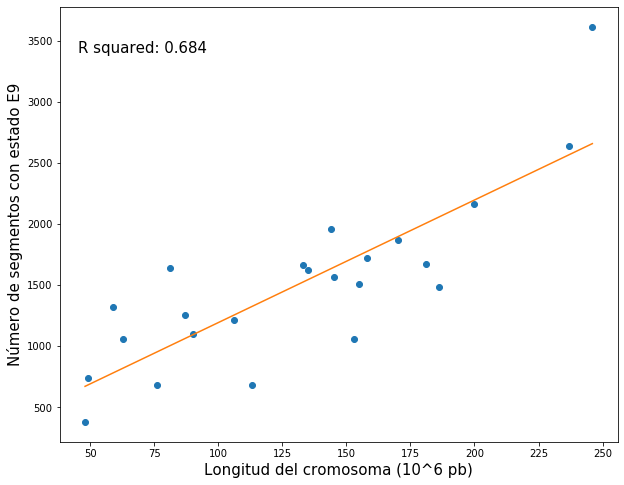

In [14]:
# Creación de gráfica de visualización de la relación entre tamaño de los cromosomas 
# y cantidad de segmentos con estado E9 (contienen sitios de unión a CTCF)

plt.figure(figsize=(10,8))

# Adición de títulos y etiquetas a los ejes
plt.ylabel('Número de segmentos con estado E9', fontsize = 15)
plt.xlabel('Longitud del cromosoma (10^6 pb)', fontsize = 15)

# Visualización de los resultados
plt.plot(x, y, "o", new_x, new_y)

# Visualización del error standard
plt.figtext('.15', .8, 'R squared: {}'.format(r_squared), fontsize = 15)

plt.show()